<a href="https://colab.research.google.com/github/emmim25/Group08_Project/blob/main/BMEN415_Group8_Final_Project_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Dataset Modelling

Regression Models: 
Yousef - (Random Forest, Bagged Forest, SVM)       Emily - (Neural Network, kNN, Bayesian Ridge)        Ethan - (Ada Boost, Multiple Linear Regression, Ridge Regression)


In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Regression_QSAR_Bioconcentration.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


Data Pre-Processing and Feature Addition

In [2]:
data.drop(['SMILES'], axis = 1, inplace = True)

#Dropping Class, Set, and CAS Code 
data.drop(['Set'], axis=1, inplace=True)
data.drop(['CAS'], axis=1, inplace=True)
data.drop(['Class'], axis=1, inplace=True)

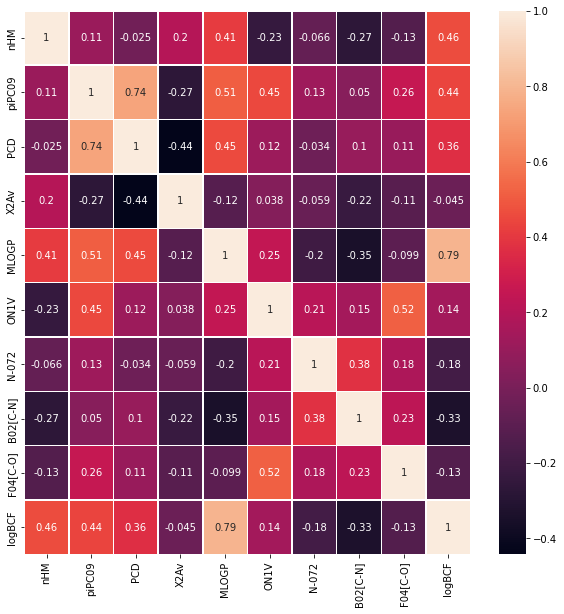

In [3]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()


Data Splitting (80% Train, 20% Test) 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt  

x = data.drop(['logBCF'], axis =1)
y = data.logBCF.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

Yousef's Regression Models

In [5]:
# 1. Random Forest



Emily's Regression Models

Test Accuracy for Bayesian Ridge Model:  0.6190309539225042
RMSE for Testing Data:  0.8218626930327526


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bayesian Ridge Model')

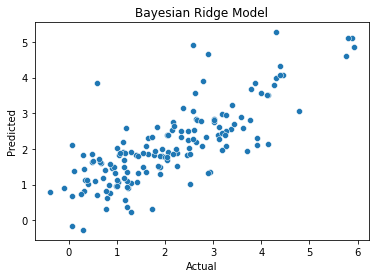

In [6]:
#Bayesian Ridge Regression Model
from sklearn.linear_model import BayesianRidge

BR=BayesianRidge(n_iter=200)
BR.fit(x_train,y_train)

y_predict_test = BR.predict(x_test)

accuracy_BR_test = r2_score(y_test, y_predict_test)
print("Test Accuracy for Bayesian Ridge Model: ", accuracy_BR_test)

RMSE_BR_test = sqrt(mean_squared_error(y_test,y_predict_test))
print("RMSE for Testing Data: ", RMSE_BR_test)

sns.scatterplot(y_test, y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bayesian Ridge Model")

(array([25]),)
28


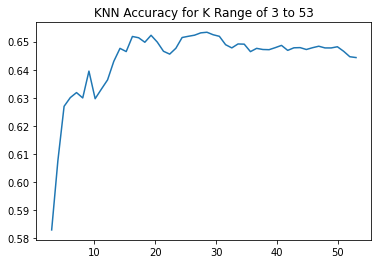

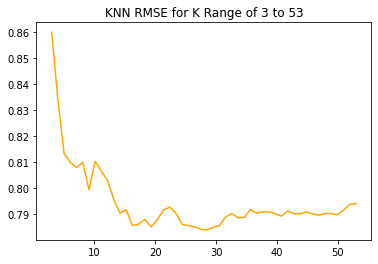

In [7]:
# K Nearest Neighbors Model
from sklearn import neighbors

accuracy_kNN = np.zeros(50)
RMSE_kNN=np.zeros(50)
for i in range(3,53): 
  kNN_data = neighbors.KNeighborsRegressor(i, weights = 'distance')

  kNN_data.fit(x_train, y_train)

  y_predict_test = kNN_data.predict(x_test)

  accuracy_kNN_test = r2_score(y_test, y_predict_test)
  accuracy_kNN[i-3]=accuracy_kNN_test
  RMSE_kNN[i-3] = sqrt(mean_squared_error(y_test, y_predict_test))

krange=np.linspace(3,53)
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 53')
plt.plot(krange, accuracy_kNN)
plt.figure(1)
plt.plot(krange, RMSE_kNN, color='orange')
plt.title('KNN RMSE for K Range of 3 to 53')

k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 25 + 3 
print(k_optimum)

kNN_data = neighbors.KNeighborsRegressor(k_optimum, weights = 'distance')
kNN_data.fit(x_train, y_train)
y_predict_test = kNN_data.predict(x_test)

Testing Accuracy for K Nearest Neighbors Model:  0.6533593774669724
RMSE for Testing Data:  0.7839604429824627


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

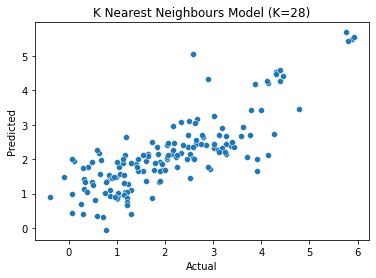

In [8]:
accuracy_kNN_test = r2_score(y_test, y_predict_test)
print("Testing Accuracy for K Nearest Neighbors Model: ", accuracy_kNN_test)

RMSE_kNN_test = sqrt(mean_squared_error(y_test, y_predict_test))
print("RMSE for Testing Data: ", RMSE_kNN_test)

sns.scatterplot(y_test, y_predict_test)
plt.title("K Nearest Neighbours Model (K=28)")
plt.xlabel('Actual')
plt.ylabel('Predicted')

Testing Accuracy for Neural Network Model:  0.6470235182775397
RMSE for Testing Data:  0.7910925718838854


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

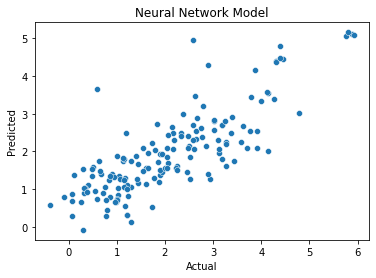

In [9]:
#Neural Network Model
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 50, max_iter = 800, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

accuracy_mlp_test = r2_score(y_test, y_predict_mlp_test)
print("Testing Accuracy for Neural Network Model: ", accuracy_mlp_test)


RMSE_mlp_test = sqrt(mean_squared_error(y_test, y_predict_mlp_test))
print("RMSE for Testing Data: ", RMSE_mlp_test)

sns.scatterplot(y_test,y_predict_mlp_test)
plt.title('Neural Network Model')
plt.xlabel("Actual")
plt.ylabel('Predicted')

##Classification Modelling

In [10]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Classification_Diabetes_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


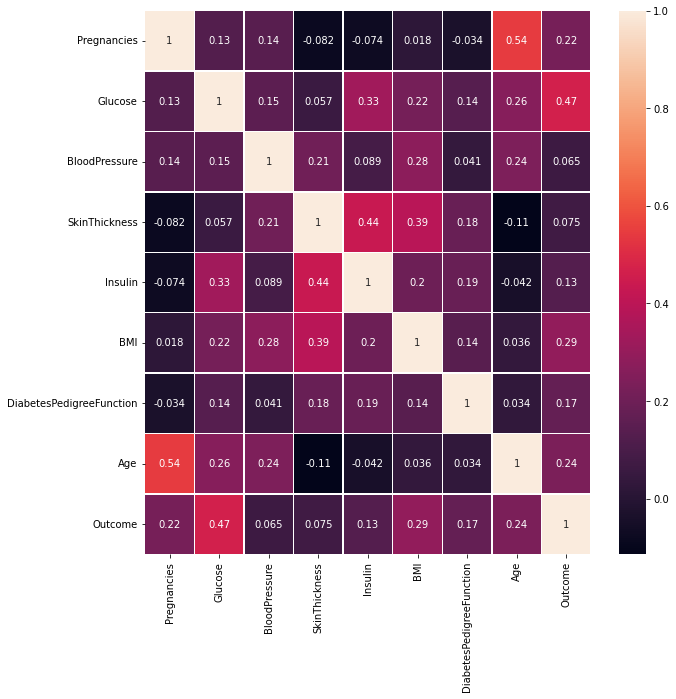

In [11]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

Data Splitting 

In [12]:
#Centering and Scaling Data
data['Age']=(data.Age-np.min(data.Age))/(np.max(data.Age)-np.min(data.Age))
data['DiabetesPedigreeFunction']=(data.DiabetesPedigreeFunction - np.min(data.DiabetesPedigreeFunction))/(np.max(data.DiabetesPedigreeFunction)-np.min(data.DiabetesPedigreeFunction))
data['BMI']=(data.BMI-np.min(data.BMI))/(np.max(data.BMI)-np.min(data.BMI))
data['BloodPressure']=(data.BloodPressure-np.min(data.BloodPressure))/(np.max(data.BloodPressure)-np.min(data.BloodPressure))
data['Glucose']=(data.Glucose-np.min(data.Glucose))/(np.max(data.Glucose)-np.min(data.Glucose))
data['Insulin']=(data.Insulin-np.min(data.Insulin))/(np.max(data.Insulin)-np.min(data.Insulin))
data['SkinThickness']=(data.SkinThickness-np.min(data.SkinThickness))/(np.max(data.SkinThickness)-np.min(data.SkinThickness))
data['Pregnancies']=(data.Pregnancies-np.min(data.Pregnancies))/(np.max(data.Pregnancies)-np.min(data.Pregnancies))

#Resampling 
import imblearn 
from imblearn.under_sampling import RandomUnderSampler

x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values

resample = RandomUnderSampler(random_state=42,replacement=True)
x,y=resample.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [13]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix

Emily's Classification Models 

(array([25]),)
28
Test Accuracy: 0.8148148148148148


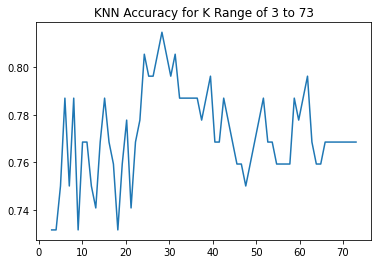

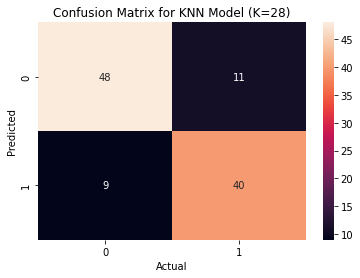

In [14]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

accuracy_kNN = np.zeros(70)

for i in range(3,73): 
  kNN = neighbors.KNeighborsClassifier(i, weights = 'uniform')

  kNN.fit(x_train, y_train)

  y_predict_test = kNN.predict(x_test)
  actual_test = y_test
  predicted_test = y_predict_test 
  test_matrix = confusion_matrix(actual_test, predicted_test)
  accuracy_kNN[i-3] = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])

k=np.linspace(3,73,num=70)
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 73')
plt.plot(k, accuracy_kNN)


k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 25 + 3 
print(k_optimum)

kNN = neighbors.KNeighborsClassifier(k_optimum, weights='uniform')

kNN.fit(x_train, y_train)

y_predict_test = kNN.predict(x_test)

actual_test = y_test
predicted_test = y_predict_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
plt.figure(1)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for KNN Model (K=28)")
test_accuracy_kNN = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_kNN)

Test Accuracy: 0.8148148148148148


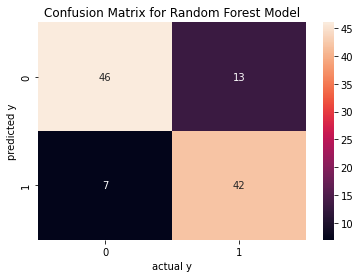

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 1200, max_depth = 30)

forest.fit(x_train, y_train)

y_predict_ens_test = forest.predict(x_test)

actual_test = y_test
predicted_test = y_predict_ens_test 


test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Random Forest Model")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

Test Accuracy: 0.7962962962962963


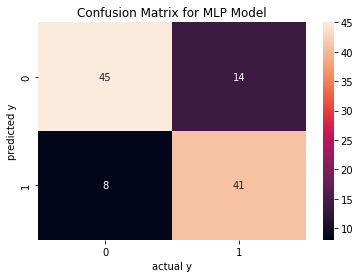

In [16]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state = 0, max_iter = 1000, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

actual_test = y_test
predicted_test = y_predict_mlp_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for MLP Model")
test_accuracy_mlp = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_mlp)